Probability of ripeness: [0.18930746]


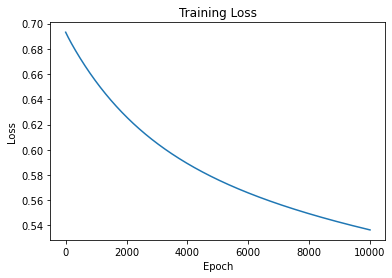

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import pickle

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Logistic regression model
class LogisticRegression:
    def __init__(self, lr=0.01, num_epochs=1000):
        self.lr = lr
        self.num_epochs = num_epochs
        self.weights = None
        self.bias = None
        self.losses = []

    def fit(self, X, y):
        num_samples, num_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient descent
        for epoch in range(self.num_epochs):
            # Linear combination
            linear_output = np.dot(X, self.weights) + self.bias

            # Activation function (sigmoid)
            y_pred = sigmoid(linear_output)

            # Calculate loss
            loss = (-1 / num_samples) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            self.losses.append(loss)

            # Calculate gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_output)
        return y_pred



# Create and train the logistic regression model
model = LogisticRegression(num_epochs = 10000)
model.fit(X, y)

# Save the trained model as a pickle file
pickle_path = 'banana.pickle'
with open(pickle_path, 'wb') as f:
    pickle.dump(model, f)

    
    
    
# Load the trained model from the pickle file
with open(pickle_path, 'rb') as f:
    loaded_model = pickle.load(f)

    
    
# Load the image
image_path = 'test_unripe_2.jpg'
image = cv2.imread(image_path)

# Calculate the average RGB values
average_rgb = np.mean(image, axis=(0, 1)) / 255.0  # Normalize values between 0 and 1
    
# Predict the probability of ripeness for the image using the loaded model
prediction = loaded_model.predict(average_rgb.reshape(1, -1))
print("Probability of ripeness:", prediction)

# Visualize the training process
plt.plot(range(len(model.losses)), model.losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Create a new directory for the GIF
output_directory = 'output'
os.makedirs(output_directory, exist_ok=True)

# Save the initial frame separately
plt.plot(range(1), model.losses[:1])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig(os.path.join(output_directory, 'frame_0.png'))
plt.close()

# # Save the training process as a GIF in the new directory
# frames = []
# for epoch in range(1, len(model.losses)):
#     plt.plot(range(epoch + 1), model.losses[:epoch + 1])
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.title('Training Loss')
#     plt.savefig(os.path.join(output_directory, f'frame_{epoch}.png'))
#     plt.close()
#     frames.append(Image.open(os.path.join(output_directory, f'frame_{epoch}.png')))

# frames[0].save(os.path.join(output_directory, 'training_process.gif'), format='GIF', append_images=frames[1:], save_all=True, duration=200, loop=0)
